In \[1\]:

    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    import tensorflow as tf
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import MinMaxScaler
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense,Dropout
    from tensorflow.keras.callbacks import EarlyStopping
    from tensorflow.keras.models import load_model
    from sklearn.metrics import confusion_matrix, classification_report
    from pickle import dump, load
    import warnings
    warnings.filterwarnings('ignore')

In \[2\]:

    tf.random.set_seed(5)

In \[3\]:

    df = pd.read_csv('loan_data.csv')
    df.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 9578 entries, 0 to 9577
    Data columns (total 14 columns):
     #   Column             Non-Null Count  Dtype  
    ---  ------             --------------  -----  
     0   credit.policy      9578 non-null   int64  
     1   purpose            9578 non-null   object 
     2   int.rate           9578 non-null   float64
     3   installment        9578 non-null   float64
     4   log.annual.inc     9578 non-null   float64
     5   dti                9578 non-null   float64
     6   fico               9578 non-null   int64  
     7   days.with.cr.line  9578 non-null   float64
     8   revol.bal          9578 non-null   int64  
     9   revol.util         9578 non-null   float64
     10  inq.last.6mths     9578 non-null   int64  
     11  delinq.2yrs        9578 non-null   int64  
     12  pub.rec            9578 non-null   int64  
     13  not.fully.paid     9578 non-null   int64  
    dtypes: float64(6), int64(7), object(1)
    memory usage: 1.0+ MB

In \[4\]:

    df.head()

Out\[4\]:

|     | credit.policy | purpose            | int.rate | installment | log.annual.inc | dti   | fico | days.with.cr.line | revol.bal | revol.util | inq.last.6mths | delinq.2yrs | pub.rec | not.fully.paid |
|-----|---------------|--------------------|----------|-------------|----------------|-------|------|-------------------|-----------|------------|----------------|-------------|---------|----------------|
| 0   | 1             | debt_consolidation | 0.1189   | 829.10      | 11.350407      | 19.48 | 737  | 5639.958333       | 28854     | 52.1       | 0              | 0           | 0       | 0              |
| 1   | 1             | credit_card        | 0.1071   | 228.22      | 11.082143      | 14.29 | 707  | 2760.000000       | 33623     | 76.7       | 0              | 0           | 0       | 0              |
| 2   | 1             | debt_consolidation | 0.1357   | 366.86      | 10.373491      | 11.63 | 682  | 4710.000000       | 3511      | 25.6       | 1              | 0           | 0       | 0              |
| 3   | 1             | debt_consolidation | 0.1008   | 162.34      | 11.350407      | 8.10  | 712  | 2699.958333       | 33667     | 73.2       | 1              | 0           | 0       | 0              |
| 4   | 1             | credit_card        | 0.1426   | 102.92      | 11.299732      | 14.97 | 667  | 4066.000000       | 4740      | 39.5       | 0              | 1           | 0       | 0              |

In \[5\]:

    df.describe().transpose()

Out\[5\]:

|                   | count  | mean         | std          | min        | 25%         | 50%         | 75%          | max          |
|-------------------|--------|--------------|--------------|------------|-------------|-------------|--------------|--------------|
| credit.policy     | 9578.0 | 0.804970     | 0.396245     | 0.000000   | 1.000000    | 1.000000    | 1.000000     | 1.000000e+00 |
| int.rate          | 9578.0 | 0.122640     | 0.026847     | 0.060000   | 0.103900    | 0.122100    | 0.140700     | 2.164000e-01 |
| installment       | 9578.0 | 319.089413   | 207.071301   | 15.670000  | 163.770000  | 268.950000  | 432.762500   | 9.401400e+02 |
| log.annual.inc    | 9578.0 | 10.932117    | 0.614813     | 7.547502   | 10.558414   | 10.928884   | 11.291293    | 1.452835e+01 |
| dti               | 9578.0 | 12.606679    | 6.883970     | 0.000000   | 7.212500    | 12.665000   | 17.950000    | 2.996000e+01 |
| fico              | 9578.0 | 710.846314   | 37.970537    | 612.000000 | 682.000000  | 707.000000  | 737.000000   | 8.270000e+02 |
| days.with.cr.line | 9578.0 | 4560.767197  | 2496.930377  | 178.958333 | 2820.000000 | 4139.958333 | 5730.000000  | 1.763996e+04 |
| revol.bal         | 9578.0 | 16913.963876 | 33756.189557 | 0.000000   | 3187.000000 | 8596.000000 | 18249.500000 | 1.207359e+06 |
| revol.util        | 9578.0 | 46.799236    | 29.014417    | 0.000000   | 22.600000   | 46.300000   | 70.900000    | 1.190000e+02 |
| inq.last.6mths    | 9578.0 | 1.577469     | 2.200245     | 0.000000   | 0.000000    | 1.000000    | 2.000000     | 3.300000e+01 |
| delinq.2yrs       | 9578.0 | 0.163708     | 0.546215     | 0.000000   | 0.000000    | 0.000000    | 0.000000     | 1.300000e+01 |
| pub.rec           | 9578.0 | 0.062122     | 0.262126     | 0.000000   | 0.000000    | 0.000000    | 0.000000     | 5.000000e+00 |
| not.fully.paid    | 9578.0 | 0.160054     | 0.366676     | 0.000000   | 0.000000    | 0.000000    | 0.000000     | 1.000000e+00 |

In \[6\]:

    df.corr()

Out\[6\]:

|                   | credit.policy | int.rate  | installment | log.annual.inc | dti       | fico      | days.with.cr.line | revol.bal | revol.util | inq.last.6mths | delinq.2yrs | pub.rec   | not.fully.paid |
|-------------------|---------------|-----------|-------------|----------------|-----------|-----------|-------------------|-----------|------------|----------------|-------------|-----------|----------------|
| credit.policy     | 1.000000      | -0.294089 | 0.058770    | 0.034906       | -0.090901 | 0.348319  | 0.099026          | -0.187518 | -0.104095  | -0.535511      | -0.076318   | -0.054243 | -0.158119      |
| int.rate          | -0.294089     | 1.000000  | 0.276140    | 0.056383       | 0.220006  | -0.714821 | -0.124022         | 0.092527  | 0.464837   | 0.202780       | 0.156079    | 0.098162  | 0.159552       |
| installment       | 0.058770      | 0.276140  | 1.000000    | 0.448102       | 0.050202  | 0.086039  | 0.183297          | 0.233625  | 0.081356   | -0.010419      | -0.004368   | -0.032760 | 0.049955       |
| log.annual.inc    | 0.034906      | 0.056383  | 0.448102    | 1.000000       | -0.054065 | 0.114576  | 0.336896          | 0.372140  | 0.054881   | 0.029171       | 0.029203    | 0.016506  | -0.033439      |
| dti               | -0.090901     | 0.220006  | 0.050202    | -0.054065      | 1.000000  | -0.241191 | 0.060101          | 0.188748  | 0.337109   | 0.029189       | -0.021792   | 0.006209  | 0.037362       |
| fico              | 0.348319      | -0.714821 | 0.086039    | 0.114576       | -0.241191 | 1.000000  | 0.263880          | -0.015553 | -0.541289  | -0.185293      | -0.216340   | -0.147592 | -0.149666      |
| days.with.cr.line | 0.099026      | -0.124022 | 0.183297    | 0.336896       | 0.060101  | 0.263880  | 1.000000          | 0.229344  | -0.024239  | -0.041736      | 0.081374    | 0.071826  | -0.029237      |
| revol.bal         | -0.187518     | 0.092527  | 0.233625    | 0.372140       | 0.188748  | -0.015553 | 0.229344          | 1.000000  | 0.203779   | 0.022394       | -0.033243   | -0.031010 | 0.053699       |
| revol.util        | -0.104095     | 0.464837  | 0.081356    | 0.054881       | 0.337109  | -0.541289 | -0.024239         | 0.203779  | 1.000000   | -0.013880      | -0.042740   | 0.066717  | 0.082088       |
| inq.last.6mths    | -0.535511     | 0.202780  | -0.010419   | 0.029171       | 0.029189  | -0.185293 | -0.041736         | 0.022394  | -0.013880  | 1.000000       | 0.021245    | 0.072673  | 0.149452       |
| delinq.2yrs       | -0.076318     | 0.156079  | -0.004368   | 0.029203       | -0.021792 | -0.216340 | 0.081374          | -0.033243 | -0.042740  | 0.021245       | 1.000000    | 0.009184  | 0.008881       |
| pub.rec           | -0.054243     | 0.098162  | -0.032760   | 0.016506       | 0.006209  | -0.147592 | 0.071826          | -0.031010 | 0.066717   | 0.072673       | 0.009184    | 1.000000  | 0.048634       |
| not.fully.paid    | -0.158119     | 0.159552  | 0.049955    | -0.033439      | 0.037362  | -0.149666 | -0.029237         | 0.053699  | 0.082088   | 0.149452       | 0.008881    | 0.048634  | 1.000000       |

In \[7\]:

    df.isnull().sum()

Out\[7\]:

    credit.policy        0
    purpose              0
    int.rate             0
    installment          0
    log.annual.inc       0
    dti                  0
    fico                 0
    days.with.cr.line    0
    revol.bal            0
    revol.util           0
    inq.last.6mths       0
    delinq.2yrs          0
    pub.rec              0
    not.fully.paid       0
    dtype: int64

In \[8\]:

    df['not.fully.paid'].value_counts()

Out\[8\]:

    0    8045
    1    1533
    Name: not.fully.paid, dtype: int64

In \[9\]:

    df['not.fully.paid'].value_counts(normalize=True)

Out\[9\]:

    0    0.839946
    1    0.160054
    Name: not.fully.paid, dtype: float64

In \[10\]:

    #handling imbalanced dataset
    not_fully_paid_0 = df[df['not.fully.paid'] == 0]
    not_fully_paid_1 = df[df['not.fully.paid'] == 1]

    print('not_fully_paid_0', not_fully_paid_0.shape)
    print('not_fully_paid_1', not_fully_paid_1.shape)

    not_fully_paid_0 (8045, 14)
    not_fully_paid_1 (1533, 14)

In \[11\]:

    #handling imbalanced data
    from sklearn.utils import resample
    df_minority_upsampled = resample(not_fully_paid_1, replace = True, n_samples = 8045)
    new_df = pd.concat([not_fully_paid_0, df_minority_upsampled])

    from sklearn.utils import shuffle
    new_df = shuffle(new_df)

In \[12\]:

    new_df['not.fully.paid'].value_counts()  #imbalanced data handled

Out\[12\]:

    0    8045
    1    8045
    Name: not.fully.paid, dtype: int64

# Feature Transformation<a href="#Feature-Transformation" class="anchor-link">¶</a>

In \[13\]:

    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()

    for i in new_df.columns:
        if new_df[i].dtypes == 'object':
            
            new_df[i] = le.fit_transform(new_df[i])

In \[14\]:

    new_df.head()

Out\[14\]:

|      | credit.policy | purpose | int.rate | installment | log.annual.inc | dti   | fico | days.with.cr.line | revol.bal | revol.util | inq.last.6mths | delinq.2yrs | pub.rec | not.fully.paid |
|------|---------------|---------|----------|-------------|----------------|-------|------|-------------------|-----------|------------|----------------|-------------|---------|----------------|
| 8895 | 0             | 0       | 0.1379   | 511.14      | 12.682332      | 9.98  | 722  | 9960.041667       | 13739     | 67.7       | 7              | 0           | 0       | 0              |
| 7966 | 0             | 6       | 0.1343   | 508.53      | 10.915088      | 19.44 | 672  | 4860.041667       | 15973     | 31.6       | 8              | 3           | 0       | 1              |
| 6614 | 1             | 2       | 0.1218   | 233.10      | 10.308953      | 19.36 | 702  | 2100.000000       | 6601      | 58.2       | 1              | 0           | 0       | 1              |
| 1388 | 1             | 1       | 0.1209   | 598.64      | 11.112448      | 19.22 | 702  | 5220.000000       | 22897     | 64.5       | 1              | 0           | 1       | 1              |
| 8549 | 0             | 0       | 0.0832   | 15.75       | 11.512925      | 14.02 | 747  | 1020.000000       | 56        | 5.6        | 1              | 0           | 0       | 0              |

# Correlation Analysis<a href="#Correlation-Analysis" class="anchor-link">¶</a>

In \[15\]:

    new_df.corr().abs()['not.fully.paid'].sort_values(ascending = False)

Out\[15\]:

    not.fully.paid       1.000000
    int.rate             0.220170
    fico                 0.207817
    credit.policy        0.196157
    inq.last.6mths       0.176442
    revol.util           0.113817
    pub.rec              0.070160
    installment          0.068896
    revol.bal            0.065856
    purpose              0.060644
    dti                  0.048362
    log.annual.inc       0.036907
    days.with.cr.line    0.032992
    delinq.2yrs          0.006328
    Name: not.fully.paid, dtype: float64

In \[16\]:

    import matplotlib.pyplot as plt
    %matplotlib inline
    import seaborn as sns
    f,axes = plt.subplots(1,1,figsize = (12,12))
    sns.heatmap(new_df.corr(), annot = True, ax = axes)
    plt.show()

![](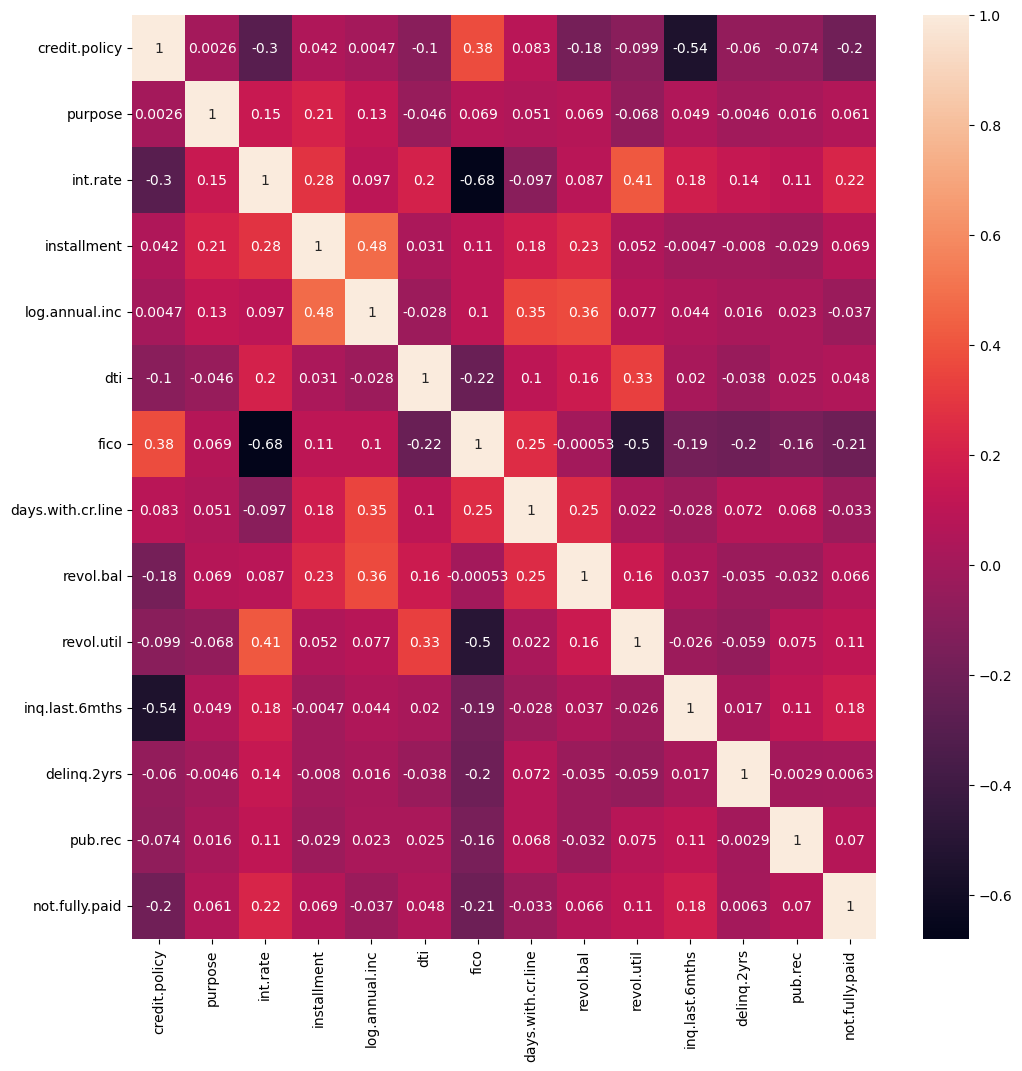%0A)

In \[17\]:

    X = new_df[["int.rate", "fico", "credit.policy", "inq.last.6mths", "revol.util", "pub.rec", "installment","purpose"]]
    y = new_df["not.fully.paid"]

In \[18\]:

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 140)

In \[19\]:

    print(X_train.shape)
    print(X_test.shape)
    print(y_train.shape)
    print(y_test.shape)

    (12872, 8)
    (3218, 8)
    (12872,)
    (3218,)

In \[20\]:

    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

# Architect the Network<a href="#Architect-the-Network" class="anchor-link">¶</a>

In \[21\]:

    from tensorflow import keras

    model = keras.Sequential(
        [
            keras.layers.Dense(
                256, activation="relu", input_shape=[8]
            ),
            keras.layers.Dense(256, activation="relu"),
            keras.layers.Dropout(0.3),
            keras.layers.Dense(256, activation="relu"),
            keras.layers.Dropout(0.3),
            keras.layers.Dense(1, activation="sigmoid"),
        ]
    )
    model.summary()

    Model: "sequential"
    _________________________________________________________________
     Layer (type)                Output Shape              Param #   
    =================================================================
     dense (Dense)               (None, 256)               2304      
                                                                     
     dense_1 (Dense)             (None, 256)               65792     
                                                                     
     dropout (Dropout)           (None, 256)               0         
                                                                     
     dense_2 (Dense)             (None, 256)               65792     
                                                                     
     dropout_1 (Dropout)         (None, 256)               0         
                                                                     
     dense_3 (Dense)             (None, 1)                 257       
                                                                     
    =================================================================
    Total params: 134,145
    Trainable params: 134,145
    Non-trainable params: 0
    _________________________________________________________________

# Compile the Model<a href="#Compile-the-Model" class="anchor-link">¶</a>

In \[22\]:

    model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['binary_accuracy'])

# Fit the Model<a href="#Fit-the-Model" class="anchor-link">¶</a>

In \[23\]:

    early_stopping = keras.callbacks.EarlyStopping(patience = 10, min_delta = 0.001, 
                                                   restore_best_weights =True )
    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        batch_size=256,
        epochs=1000,
        callbacks=[early_stopping],
        verbose=1, 
    )

    Epoch 1/1000
    51/51 [==============================] - 1s 13ms/step - loss: 0.6520 - binary_accuracy: 0.6072 - val_loss: 0.6471 - val_binary_accuracy: 0.6165
    Epoch 2/1000
    51/51 [==============================] - 0s 7ms/step - loss: 0.6425 - binary_accuracy: 0.6217 - val_loss: 0.6439 - val_binary_accuracy: 0.6181
    Epoch 3/1000
    51/51 [==============================] - 0s 7ms/step - loss: 0.6381 - binary_accuracy: 0.6274 - val_loss: 0.6397 - val_binary_accuracy: 0.6237
    Epoch 4/1000
    51/51 [==============================] - 0s 7ms/step - loss: 0.6351 - binary_accuracy: 0.6318 - val_loss: 0.6381 - val_binary_accuracy: 0.6299
    Epoch 5/1000
    51/51 [==============================] - 0s 7ms/step - loss: 0.6329 - binary_accuracy: 0.6400 - val_loss: 0.6377 - val_binary_accuracy: 0.6221
    Epoch 6/1000
    51/51 [==============================] - 0s 7ms/step - loss: 0.6302 - binary_accuracy: 0.6443 - val_loss: 0.6351 - val_binary_accuracy: 0.6218
    Epoch 7/1000
    51/51 [==============================] - 0s 7ms/step - loss: 0.6292 - binary_accuracy: 0.6402 - val_loss: 0.6363 - val_binary_accuracy: 0.6262
    Epoch 8/1000
    51/51 [==============================] - 0s 7ms/step - loss: 0.6244 - binary_accuracy: 0.6471 - val_loss: 0.6330 - val_binary_accuracy: 0.6327
    Epoch 9/1000
    51/51 [==============================] - 0s 7ms/step - loss: 0.6209 - binary_accuracy: 0.6519 - val_loss: 0.6318 - val_binary_accuracy: 0.6274
    Epoch 10/1000
    51/51 [==============================] - 0s 7ms/step - loss: 0.6179 - binary_accuracy: 0.6502 - val_loss: 0.6301 - val_binary_accuracy: 0.6386
    Epoch 11/1000
    51/51 [==============================] - 0s 7ms/step - loss: 0.6145 - binary_accuracy: 0.6551 - val_loss: 0.6285 - val_binary_accuracy: 0.6346
    Epoch 12/1000
    51/51 [==============================] - 0s 8ms/step - loss: 0.6088 - binary_accuracy: 0.6553 - val_loss: 0.6262 - val_binary_accuracy: 0.6374
    Epoch 13/1000
    51/51 [==============================] - 0s 7ms/step - loss: 0.6078 - binary_accuracy: 0.6642 - val_loss: 0.6239 - val_binary_accuracy: 0.6436
    Epoch 14/1000
    51/51 [==============================] - 0s 8ms/step - loss: 0.6057 - binary_accuracy: 0.6617 - val_loss: 0.6228 - val_binary_accuracy: 0.6442
    Epoch 15/1000
    51/51 [==============================] - 0s 7ms/step - loss: 0.6001 - binary_accuracy: 0.6670 - val_loss: 0.6185 - val_binary_accuracy: 0.6429
    Epoch 16/1000
    51/51 [==============================] - 0s 8ms/step - loss: 0.5953 - binary_accuracy: 0.6711 - val_loss: 0.6174 - val_binary_accuracy: 0.6504
    Epoch 17/1000
    51/51 [==============================] - 0s 7ms/step - loss: 0.5939 - binary_accuracy: 0.6715 - val_loss: 0.6137 - val_binary_accuracy: 0.6613
    Epoch 18/1000
    51/51 [==============================] - 0s 7ms/step - loss: 0.5867 - binary_accuracy: 0.6798 - val_loss: 0.6106 - val_binary_accuracy: 0.6576
    Epoch 19/1000
    51/51 [==============================] - 0s 7ms/step - loss: 0.5823 - binary_accuracy: 0.6877 - val_loss: 0.6090 - val_binary_accuracy: 0.6631
    Epoch 20/1000
    51/51 [==============================] - 0s 7ms/step - loss: 0.5762 - binary_accuracy: 0.6912 - val_loss: 0.6062 - val_binary_accuracy: 0.6610
    Epoch 21/1000
    51/51 [==============================] - 0s 7ms/step - loss: 0.5744 - binary_accuracy: 0.6898 - val_loss: 0.6069 - val_binary_accuracy: 0.6681
    Epoch 22/1000
    51/51 [==============================] - 0s 7ms/step - loss: 0.5708 - binary_accuracy: 0.6934 - val_loss: 0.5963 - val_binary_accuracy: 0.6687
    Epoch 23/1000
    51/51 [==============================] - 0s 7ms/step - loss: 0.5641 - binary_accuracy: 0.7018 - val_loss: 0.5973 - val_binary_accuracy: 0.6759
    Epoch 24/1000
    51/51 [==============================] - 0s 7ms/step - loss: 0.5562 - binary_accuracy: 0.7063 - val_loss: 0.5875 - val_binary_accuracy: 0.6852
    Epoch 25/1000
    51/51 [==============================] - 0s 7ms/step - loss: 0.5537 - binary_accuracy: 0.7053 - val_loss: 0.5859 - val_binary_accuracy: 0.6865
    Epoch 26/1000
    51/51 [==============================] - 0s 9ms/step - loss: 0.5498 - binary_accuracy: 0.7112 - val_loss: 0.5754 - val_binary_accuracy: 0.6967
    Epoch 27/1000
    51/51 [==============================] - 0s 8ms/step - loss: 0.5393 - binary_accuracy: 0.7181 - val_loss: 0.5736 - val_binary_accuracy: 0.6908
    Epoch 28/1000
    51/51 [==============================] - 0s 7ms/step - loss: 0.5348 - binary_accuracy: 0.7195 - val_loss: 0.5779 - val_binary_accuracy: 0.6908
    Epoch 29/1000
    51/51 [==============================] - 0s 7ms/step - loss: 0.5310 - binary_accuracy: 0.7244 - val_loss: 0.5672 - val_binary_accuracy: 0.6936
    Epoch 30/1000
    51/51 [==============================] - 0s 9ms/step - loss: 0.5265 - binary_accuracy: 0.7314 - val_loss: 0.5659 - val_binary_accuracy: 0.7076
    Epoch 31/1000
    51/51 [==============================] - 0s 8ms/step - loss: 0.5171 - binary_accuracy: 0.7394 - val_loss: 0.5675 - val_binary_accuracy: 0.7070
    Epoch 32/1000
    51/51 [==============================] - 0s 8ms/step - loss: 0.5158 - binary_accuracy: 0.7410 - val_loss: 0.5607 - val_binary_accuracy: 0.7181
    Epoch 33/1000
    51/51 [==============================] - 0s 8ms/step - loss: 0.5132 - binary_accuracy: 0.7383 - val_loss: 0.5620 - val_binary_accuracy: 0.7101
    Epoch 34/1000
    51/51 [==============================] - 0s 8ms/step - loss: 0.5065 - binary_accuracy: 0.7397 - val_loss: 0.5589 - val_binary_accuracy: 0.7203
    Epoch 35/1000
    51/51 [==============================] - 0s 9ms/step - loss: 0.4951 - binary_accuracy: 0.7493 - val_loss: 0.5484 - val_binary_accuracy: 0.7141
    Epoch 36/1000
    51/51 [==============================] - 0s 8ms/step - loss: 0.4940 - binary_accuracy: 0.7529 - val_loss: 0.5537 - val_binary_accuracy: 0.7138
    Epoch 37/1000
    51/51 [==============================] - 0s 9ms/step - loss: 0.4929 - binary_accuracy: 0.7535 - val_loss: 0.5435 - val_binary_accuracy: 0.7272
    Epoch 38/1000
    51/51 [==============================] - 0s 9ms/step - loss: 0.4805 - binary_accuracy: 0.7601 - val_loss: 0.5324 - val_binary_accuracy: 0.7300
    Epoch 39/1000
    51/51 [==============================] - 0s 9ms/step - loss: 0.4822 - binary_accuracy: 0.7603 - val_loss: 0.5374 - val_binary_accuracy: 0.7328
    Epoch 40/1000
    51/51 [==============================] - 0s 9ms/step - loss: 0.4747 - binary_accuracy: 0.7654 - val_loss: 0.5319 - val_binary_accuracy: 0.7405
    Epoch 41/1000
    51/51 [==============================] - 0s 9ms/step - loss: 0.4653 - binary_accuracy: 0.7706 - val_loss: 0.5250 - val_binary_accuracy: 0.7334
    Epoch 42/1000
    51/51 [==============================] - 0s 9ms/step - loss: 0.4619 - binary_accuracy: 0.7732 - val_loss: 0.5365 - val_binary_accuracy: 0.7368
    Epoch 43/1000
    51/51 [==============================] - 0s 9ms/step - loss: 0.4613 - binary_accuracy: 0.7741 - val_loss: 0.5286 - val_binary_accuracy: 0.7393
    Epoch 44/1000
    51/51 [==============================] - 0s 9ms/step - loss: 0.4510 - binary_accuracy: 0.7815 - val_loss: 0.5314 - val_binary_accuracy: 0.7387
    Epoch 45/1000
    51/51 [==============================] - 0s 9ms/step - loss: 0.4501 - binary_accuracy: 0.7835 - val_loss: 0.5238 - val_binary_accuracy: 0.7548
    Epoch 46/1000
    51/51 [==============================] - 0s 9ms/step - loss: 0.4449 - binary_accuracy: 0.7852 - val_loss: 0.5045 - val_binary_accuracy: 0.7595
    Epoch 47/1000
    51/51 [==============================] - 0s 9ms/step - loss: 0.4353 - binary_accuracy: 0.7892 - val_loss: 0.5075 - val_binary_accuracy: 0.7551
    Epoch 48/1000
    51/51 [==============================] - 0s 9ms/step - loss: 0.4350 - binary_accuracy: 0.7892 - val_loss: 0.5107 - val_binary_accuracy: 0.7480
    Epoch 49/1000
    51/51 [==============================] - 0s 9ms/step - loss: 0.4332 - binary_accuracy: 0.7873 - val_loss: 0.4942 - val_binary_accuracy: 0.7679
    Epoch 50/1000
    51/51 [==============================] - 0s 9ms/step - loss: 0.4251 - binary_accuracy: 0.7966 - val_loss: 0.5003 - val_binary_accuracy: 0.7679
    Epoch 51/1000
    51/51 [==============================] - 0s 9ms/step - loss: 0.4243 - binary_accuracy: 0.7951 - val_loss: 0.5005 - val_binary_accuracy: 0.7644
    Epoch 52/1000
    51/51 [==============================] - 0s 9ms/step - loss: 0.4145 - binary_accuracy: 0.8069 - val_loss: 0.4983 - val_binary_accuracy: 0.7551
    Epoch 53/1000
    51/51 [==============================] - 0s 9ms/step - loss: 0.4167 - binary_accuracy: 0.7983 - val_loss: 0.4965 - val_binary_accuracy: 0.7676
    Epoch 54/1000
    51/51 [==============================] - 0s 8ms/step - loss: 0.4026 - binary_accuracy: 0.8139 - val_loss: 0.4964 - val_binary_accuracy: 0.7648
    Epoch 55/1000
    51/51 [==============================] - 0s 8ms/step - loss: 0.4050 - binary_accuracy: 0.8111 - val_loss: 0.4908 - val_binary_accuracy: 0.7728
    Epoch 56/1000
    51/51 [==============================] - 0s 8ms/step - loss: 0.4030 - binary_accuracy: 0.8071 - val_loss: 0.4867 - val_binary_accuracy: 0.7744
    Epoch 57/1000
    51/51 [==============================] - 0s 9ms/step - loss: 0.3947 - binary_accuracy: 0.8114 - val_loss: 0.4921 - val_binary_accuracy: 0.7800
    Epoch 58/1000
    51/51 [==============================] - 0s 9ms/step - loss: 0.3921 - binary_accuracy: 0.8149 - val_loss: 0.4890 - val_binary_accuracy: 0.7753
    Epoch 59/1000
    51/51 [==============================] - 0s 9ms/step - loss: 0.3938 - binary_accuracy: 0.8175 - val_loss: 0.4862 - val_binary_accuracy: 0.7887
    Epoch 60/1000
    51/51 [==============================] - 0s 8ms/step - loss: 0.3863 - binary_accuracy: 0.8198 - val_loss: 0.4832 - val_binary_accuracy: 0.7822
    Epoch 61/1000
    51/51 [==============================] - 0s 8ms/step - loss: 0.3785 - binary_accuracy: 0.8207 - val_loss: 0.4764 - val_binary_accuracy: 0.7881
    Epoch 62/1000
    51/51 [==============================] - 0s 9ms/step - loss: 0.3763 - binary_accuracy: 0.8258 - val_loss: 0.4769 - val_binary_accuracy: 0.7918
    Epoch 63/1000
    51/51 [==============================] - 0s 9ms/step - loss: 0.3704 - binary_accuracy: 0.8285 - val_loss: 0.4723 - val_binary_accuracy: 0.7868
    Epoch 64/1000
    51/51 [==============================] - 0s 8ms/step - loss: 0.3677 - binary_accuracy: 0.8297 - val_loss: 0.4754 - val_binary_accuracy: 0.7940
    Epoch 65/1000
    51/51 [==============================] - 0s 9ms/step - loss: 0.3712 - binary_accuracy: 0.8285 - val_loss: 0.4667 - val_binary_accuracy: 0.7974
    Epoch 66/1000
    51/51 [==============================] - 0s 10ms/step - loss: 0.3613 - binary_accuracy: 0.8323 - val_loss: 0.4544 - val_binary_accuracy: 0.8055
    Epoch 67/1000
    51/51 [==============================] - 0s 10ms/step - loss: 0.3612 - binary_accuracy: 0.8333 - val_loss: 0.4520 - val_binary_accuracy: 0.8005
    Epoch 68/1000
    51/51 [==============================] - 0s 10ms/step - loss: 0.3562 - binary_accuracy: 0.8361 - val_loss: 0.4659 - val_binary_accuracy: 0.8011
    Epoch 69/1000
    51/51 [==============================] - 0s 9ms/step - loss: 0.3593 - binary_accuracy: 0.8341 - val_loss: 0.4511 - val_binary_accuracy: 0.8111
    Epoch 70/1000
    51/51 [==============================] - 0s 10ms/step - loss: 0.3473 - binary_accuracy: 0.8396 - val_loss: 0.4508 - val_binary_accuracy: 0.8108
    Epoch 71/1000
    51/51 [==============================] - 0s 10ms/step - loss: 0.3442 - binary_accuracy: 0.8442 - val_loss: 0.4590 - val_binary_accuracy: 0.8073
    Epoch 72/1000
    51/51 [==============================] - 0s 9ms/step - loss: 0.3385 - binary_accuracy: 0.8475 - val_loss: 0.4513 - val_binary_accuracy: 0.8083
    Epoch 73/1000
    51/51 [==============================] - 0s 10ms/step - loss: 0.3447 - binary_accuracy: 0.8392 - val_loss: 0.4526 - val_binary_accuracy: 0.8076
    Epoch 74/1000
    51/51 [==============================] - 0s 9ms/step - loss: 0.3343 - binary_accuracy: 0.8479 - val_loss: 0.4468 - val_binary_accuracy: 0.8126
    Epoch 75/1000
    51/51 [==============================] - 0s 9ms/step - loss: 0.3397 - binary_accuracy: 0.8477 - val_loss: 0.4576 - val_binary_accuracy: 0.8142
    Epoch 76/1000
    51/51 [==============================] - 0s 9ms/step - loss: 0.3288 - binary_accuracy: 0.8538 - val_loss: 0.4517 - val_binary_accuracy: 0.8120
    Epoch 77/1000
    51/51 [==============================] - 0s 10ms/step - loss: 0.3321 - binary_accuracy: 0.8491 - val_loss: 0.4448 - val_binary_accuracy: 0.8117
    Epoch 78/1000
    51/51 [==============================] - 0s 10ms/step - loss: 0.3280 - binary_accuracy: 0.8533 - val_loss: 0.4447 - val_binary_accuracy: 0.8173
    Epoch 79/1000
    51/51 [==============================] - 0s 9ms/step - loss: 0.3217 - binary_accuracy: 0.8550 - val_loss: 0.4303 - val_binary_accuracy: 0.8238
    Epoch 80/1000
    51/51 [==============================] - 1s 11ms/step - loss: 0.3175 - binary_accuracy: 0.8595 - val_loss: 0.4325 - val_binary_accuracy: 0.8275
    Epoch 81/1000
    51/51 [==============================] - 1s 11ms/step - loss: 0.3096 - binary_accuracy: 0.8637 - val_loss: 0.4520 - val_binary_accuracy: 0.8219
    Epoch 82/1000
    51/51 [==============================] - 1s 10ms/step - loss: 0.3123 - binary_accuracy: 0.8610 - val_loss: 0.4394 - val_binary_accuracy: 0.8229
    Epoch 83/1000
    51/51 [==============================] - 1s 10ms/step - loss: 0.3115 - binary_accuracy: 0.8610 - val_loss: 0.4400 - val_binary_accuracy: 0.8213
    Epoch 84/1000
    51/51 [==============================] - 0s 10ms/step - loss: 0.3030 - binary_accuracy: 0.8679 - val_loss: 0.4337 - val_binary_accuracy: 0.8316
    Epoch 85/1000
    51/51 [==============================] - 1s 10ms/step - loss: 0.3030 - binary_accuracy: 0.8687 - val_loss: 0.4252 - val_binary_accuracy: 0.8285
    Epoch 86/1000
    51/51 [==============================] - 1s 13ms/step - loss: 0.3020 - binary_accuracy: 0.8684 - val_loss: 0.4316 - val_binary_accuracy: 0.8269
    Epoch 87/1000
    51/51 [==============================] - 0s 10ms/step - loss: 0.2993 - binary_accuracy: 0.8676 - val_loss: 0.4184 - val_binary_accuracy: 0.8297
    Epoch 88/1000
    51/51 [==============================] - 1s 11ms/step - loss: 0.2953 - binary_accuracy: 0.8676 - val_loss: 0.4184 - val_binary_accuracy: 0.8337
    Epoch 89/1000
    51/51 [==============================] - 1s 10ms/step - loss: 0.3004 - binary_accuracy: 0.8682 - val_loss: 0.4185 - val_binary_accuracy: 0.8260
    Epoch 90/1000
    51/51 [==============================] - 1s 11ms/step - loss: 0.2975 - binary_accuracy: 0.8671 - val_loss: 0.4388 - val_binary_accuracy: 0.8288
    Epoch 91/1000
    51/51 [==============================] - 1s 13ms/step - loss: 0.2877 - binary_accuracy: 0.8695 - val_loss: 0.4099 - val_binary_accuracy: 0.8446
    Epoch 92/1000
    51/51 [==============================] - 0s 10ms/step - loss: 0.2932 - binary_accuracy: 0.8716 - val_loss: 0.4295 - val_binary_accuracy: 0.8272
    Epoch 93/1000
    51/51 [==============================] - 0s 9ms/step - loss: 0.2855 - binary_accuracy: 0.8764 - val_loss: 0.4242 - val_binary_accuracy: 0.8412
    Epoch 94/1000
    51/51 [==============================] - 0s 10ms/step - loss: 0.2840 - binary_accuracy: 0.8726 - val_loss: 0.4483 - val_binary_accuracy: 0.8288
    Epoch 95/1000
    51/51 [==============================] - 1s 10ms/step - loss: 0.2814 - binary_accuracy: 0.8736 - val_loss: 0.4103 - val_binary_accuracy: 0.8409
    Epoch 96/1000
    51/51 [==============================] - 0s 9ms/step - loss: 0.2784 - binary_accuracy: 0.8765 - val_loss: 0.4066 - val_binary_accuracy: 0.8415
    Epoch 97/1000
    51/51 [==============================] - 1s 10ms/step - loss: 0.2828 - binary_accuracy: 0.8786 - val_loss: 0.4125 - val_binary_accuracy: 0.8387
    Epoch 98/1000
    51/51 [==============================] - 1s 10ms/step - loss: 0.2737 - binary_accuracy: 0.8810 - val_loss: 0.4307 - val_binary_accuracy: 0.8375
    Epoch 99/1000
    51/51 [==============================] - 1s 10ms/step - loss: 0.2791 - binary_accuracy: 0.8780 - val_loss: 0.4253 - val_binary_accuracy: 0.8347
    Epoch 100/1000
    51/51 [==============================] - 1s 10ms/step - loss: 0.2793 - binary_accuracy: 0.8782 - val_loss: 0.4150 - val_binary_accuracy: 0.8431
    Epoch 101/1000
    51/51 [==============================] - 1s 12ms/step - loss: 0.2731 - binary_accuracy: 0.8825 - val_loss: 0.4143 - val_binary_accuracy: 0.8418
    Epoch 102/1000
    51/51 [==============================] - 1s 11ms/step - loss: 0.2769 - binary_accuracy: 0.8785 - val_loss: 0.4134 - val_binary_accuracy: 0.8502
    Epoch 103/1000
    51/51 [==============================] - 1s 10ms/step - loss: 0.2626 - binary_accuracy: 0.8853 - val_loss: 0.4240 - val_binary_accuracy: 0.8406
    Epoch 104/1000
    51/51 [==============================] - 1s 11ms/step - loss: 0.2654 - binary_accuracy: 0.8877 - val_loss: 0.4112 - val_binary_accuracy: 0.8452
    Epoch 105/1000
    51/51 [==============================] - 1s 12ms/step - loss: 0.2615 - binary_accuracy: 0.8877 - val_loss: 0.4048 - val_binary_accuracy: 0.8499
    Epoch 106/1000
    51/51 [==============================] - 1s 11ms/step - loss: 0.2585 - binary_accuracy: 0.8885 - val_loss: 0.4010 - val_binary_accuracy: 0.8511
    Epoch 107/1000
    51/51 [==============================] - 0s 10ms/step - loss: 0.2690 - binary_accuracy: 0.8835 - val_loss: 0.4257 - val_binary_accuracy: 0.8459
    Epoch 108/1000
    51/51 [==============================] - 0s 10ms/step - loss: 0.2645 - binary_accuracy: 0.8877 - val_loss: 0.3977 - val_binary_accuracy: 0.8546
    Epoch 109/1000
    51/51 [==============================] - 1s 10ms/step - loss: 0.2563 - binary_accuracy: 0.8897 - val_loss: 0.4134 - val_binary_accuracy: 0.8493
    Epoch 110/1000
    51/51 [==============================] - 1s 10ms/step - loss: 0.2466 - binary_accuracy: 0.8961 - val_loss: 0.3918 - val_binary_accuracy: 0.8462
    Epoch 111/1000
    51/51 [==============================] - 0s 9ms/step - loss: 0.2589 - binary_accuracy: 0.8930 - val_loss: 0.4014 - val_binary_accuracy: 0.8549
    Epoch 112/1000
    51/51 [==============================] - 0s 9ms/step - loss: 0.2509 - binary_accuracy: 0.8927 - val_loss: 0.3954 - val_binary_accuracy: 0.8623
    Epoch 113/1000
    51/51 [==============================] - 0s 9ms/step - loss: 0.2522 - binary_accuracy: 0.8941 - val_loss: 0.4192 - val_binary_accuracy: 0.8505
    Epoch 114/1000
    51/51 [==============================] - 0s 9ms/step - loss: 0.2551 - binary_accuracy: 0.8905 - val_loss: 0.3946 - val_binary_accuracy: 0.8642
    Epoch 115/1000
    51/51 [==============================] - 0s 9ms/step - loss: 0.2455 - binary_accuracy: 0.8960 - val_loss: 0.4243 - val_binary_accuracy: 0.8505
    Epoch 116/1000
    51/51 [==============================] - 0s 9ms/step - loss: 0.2464 - binary_accuracy: 0.8992 - val_loss: 0.4300 - val_binary_accuracy: 0.8490
    Epoch 117/1000
    51/51 [==============================] - 0s 9ms/step - loss: 0.2496 - binary_accuracy: 0.8942 - val_loss: 0.3957 - val_binary_accuracy: 0.8617
    Epoch 118/1000
    51/51 [==============================] - 0s 9ms/step - loss: 0.2389 - binary_accuracy: 0.8955 - val_loss: 0.3980 - val_binary_accuracy: 0.8589
    Epoch 119/1000
    51/51 [==============================] - 1s 10ms/step - loss: 0.2476 - binary_accuracy: 0.8961 - val_loss: 0.3969 - val_binary_accuracy: 0.8561
    Epoch 120/1000
    51/51 [==============================] - 0s 9ms/step - loss: 0.2366 - binary_accuracy: 0.9006 - val_loss: 0.4003 - val_binary_accuracy: 0.8574

# Predictions<a href="#Predictions" class="anchor-link">¶</a>

In \[24\]:

    predictions =(model.predict(X_test)>0.5).astype("int32")
                  
    predictions

    101/101 [==============================] - 0s 2ms/step

Out\[24\]:

    array([[0],
           [1],
           [1],
           ...,
           [0],
           [1],
           [0]])

In \[25\]:

    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
    accuracy_score(y_test, predictions)

Out\[25\]:

    0.846177750155376

In \[26\]:

    print(classification_report(y_test, predictions))

                  precision    recall  f1-score   support

               0       0.89      0.79      0.84      1597
               1       0.81      0.90      0.86      1621

        accuracy                           0.85      3218
       macro avg       0.85      0.85      0.85      3218
    weighted avg       0.85      0.85      0.85      3218